In [18]:
import sympy as sy
import matplotlib.pyplot as plt
import time
sy.init_printing()

# Exploración

## Creación y visualización matríz

In [19]:
A = sy.Matrix([[1,3,1], [1,1,1], [2, 3, 2]])
A.norm()

In [20]:
b = sy.Matrix([3,2,1])
b

⎡3⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣1⎦

## Función rref()
1. (Matríz reducida) Forma escalonada de fila reducida de la matríz M
2. (Índices columnas de pivote) Tupla de índice de las columnas pivote


In [21]:
reduce_A = A.rref()
reduce_A

⎛⎡1  0  1⎤        ⎞
⎜⎢       ⎥        ⎟
⎜⎢0  1  0⎥, (0, 1)⎟
⎜⎢       ⎥        ⎟
⎝⎣0  0  0⎦        ⎠

## Solución del sistema de ecuaciones Ax = b con la ayuda de la función LUsolve

In [22]:
x = A.LUsolve(b)
x

NonInvertibleMatrixError: Matrix det == 0; not invertible.

- Verificación de la solución A*x = b. 
- El resultado debe darnos nuevamente la matrix b.

In [ ]:
A@x # Verificación de la solución 

## Esta parte nos dará el valor y su multiplicidad algebráica

In [ ]:
A.eigenvals()

##  Esta parte nos dará los valores propios, multiplicidades y vectores propios correspondientes

In [ ]:
A.eigenvects()

# IMPLEMENTACIÓN

In [ ]:
def solv(A, b):
    x = A.LUsolve(b)
    return x

In [ ]:
def tiempo(A, b):
    start = time.time()
    solv(A, b)
    end = time.time()
    return end - start

## Resultado ejemplo matriz dimensión 3x3

In [ ]:
A = sy.Matrix([[1,3, sy.Rational(5,6)], [1,3,1], [sy.Rational(3/2), 3, 2]])
b = sy.Matrix([3,2,1])
print("Dimension: ", A.shape, "Tiempo: ", tiempo(A, b), "s")

solv(A,b)

## Comparación tiempos dada ciertas dimensiones

In [ ]:
def obtenerDimensionesPotencia(base, cantidadDimensiones):
    dimensiones = []
    for i in range(1, cantidadDimensiones):
        dimensiones.append(base**i)
    return dimensiones

def obtenerDimensionesLineal(inicio, fin, steps: int):
    dimensiones = []
    for i in range(inicio, fin, steps):
        dimensiones.append(i)
    return dimensiones

In [ ]:
# Obtenemos las dimensiones de la matriz de forma potencial
# dimensiones = obtenerDimensionesPotencia(2, 7)

# Obtenemos las dimensiones de la matriz de forma lineal con pasos de a x pasos
xPasos = 2
dimensiones = obtenerDimensionesLineal(2, 100, xPasos)

# Inicializamos matrices aleatorias para A y b
A = [sy.randMatrix(dim, dim, 1) for dim in dimensiones]
b = [sy.randMatrix(dim, 1, 1) for dim in dimensiones]

dimensiones

### Ejemplo de la primera matriz aleatoria A y b

In [ ]:
(A[0], b[0])

### Ejemplo de la segunda matriz aleatoria A y b

In [ ]:
(A[1], b[1])

### Ejemplo de la quinta matriz aleatoria A y b

In [ ]:
(A[4], b[4])

### Dimensiones y tiempo de solución en segundos y graficación de tiempo vs dimensiones

Dimension:  70  Tiempo:  9.56111764907837 s
Dimension:  72  Tiempo:  11.773967981338501 s
Dimension:  74  Tiempo:  11.900057077407837 s
Dimension:  76  Tiempo:  14.152865171432495 s
Dimension:  78  Tiempo:  15.894174337387085 s
Dimension:  80  Tiempo:  17.999770164489746 s
Dimension:  82  Tiempo:  16.51367497444153 s
Dimension:  84  Tiempo:  16.412895441055298 s
Dimension:  86  Tiempo:  18.872260093688965 s
Dimension:  88  Tiempo:  17.20766568183899 s
Dimension:  90  Tiempo:  20.89058804512024 s
Dimension:  92  Tiempo:  23.728819131851196 s
Dimension:  94  Tiempo:  21.955105304718018 s
Dimension:  96  Tiempo:  21.46184492111206 s
Dimension:  98  Tiempo:  22.544835567474365 s


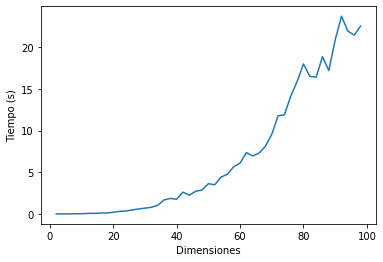

In [17]:
resultados = []
for i in range(len(dimensiones)):
    resultados.append(tiempo(A[i], b[i]))
    print("Dimension: ", dimensiones[i], " Tiempo: ", resultados[i], "s")

plt.xlabel("Dimensiones")
plt.ylabel("Tiempo (s)")
plt.plot(dimensiones, resultados)